# The Sparks Foundation.

# Abhishek Mohan Ambawale.

## Task #2 = From given 'Iris' dataset, predict the optimum number of clusters and represent it visually.

### **Importing libraries**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

### **Importing dataset**

In [2]:
df = pd.read_csv(r"/content/sample_data/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## **Checking for null values.**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


As we can see in above tab, there are no null values.

Column Id is not required and We have assumed that,we do not have species column to form clusters and then used to check our model performance. Hence we'll drop them.

In [4]:
df.drop(columns=['Id','Species'],inplace = True)

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Let's have a look at the dataset through scatterplot.

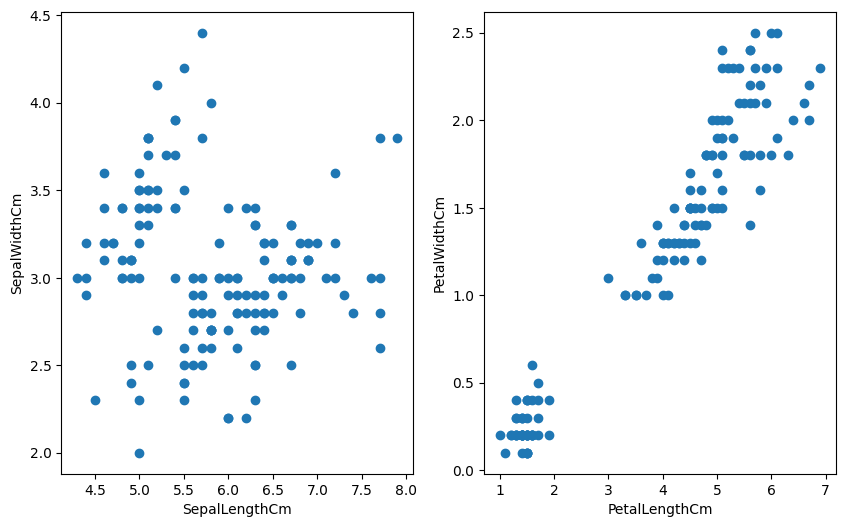

In [6]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'])
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")

plt.subplot(1,2,2)
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'])
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.show()

# KMeans Clustering using sepal length and sepal width.

In [7]:
x = df.iloc[:,0:2]

In [8]:
x.head()

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


### Using Elbow method to find out the optimal no. of clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Elbow Method')

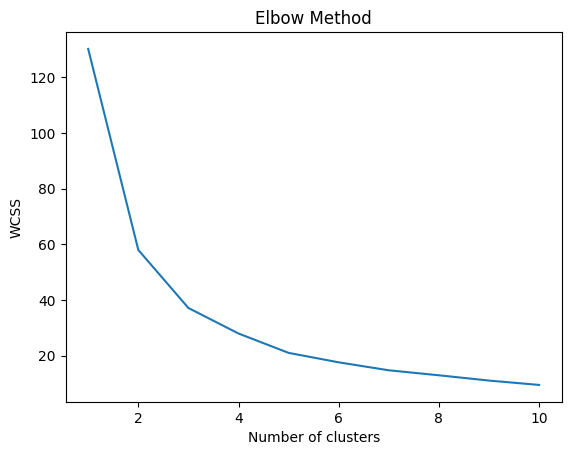

In [9]:
wcss = []

for i in range(1,11):
  km = KMeans(n_clusters=i,init='k-means++')
  km.fit_predict(x)
  wcss.append(km.inertia_)

plt.plot(range(1,11),wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")


In [10]:
km = KMeans(n_clusters=3)
y_means = km.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


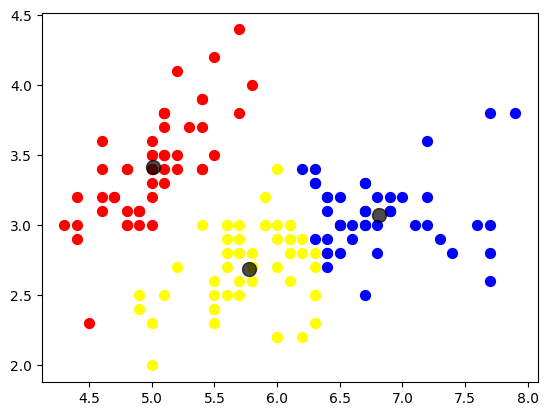

In [11]:
plt.scatter(x[y_means == 0]['SepalLengthCm'], x[y_means == 0]['SepalWidthCm'], s = 50, c = 'red', label = 'Iris Setosa')
plt.scatter(x[y_means == 1]['SepalLengthCm'], x[y_means == 1]['SepalWidthCm'], s = 50, c = 'blue', label = 'Iris Versicolor')
plt.scatter(x[y_means == 2]['SepalLengthCm'], x[y_means == 2]['SepalWidthCm'], s = 50, c = 'yellow', label = 'Iris Versicolor')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=100,c='black',label='Centroids',alpha=0.7)

plt.show()

### Validation of cluster

In [12]:
from sklearn.metrics import silhouette_score,adjusted_rand_score,jaccard_score,confusion_matrix

In [13]:
silhouette_score(x,y_means)

0.4434693231245126

# KMeans Clustering using petal length and petal width.

In [14]:
x = df.iloc[:,2:]
x.head()

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [15]:
km = KMeans(n_clusters=3)
y_means = km.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


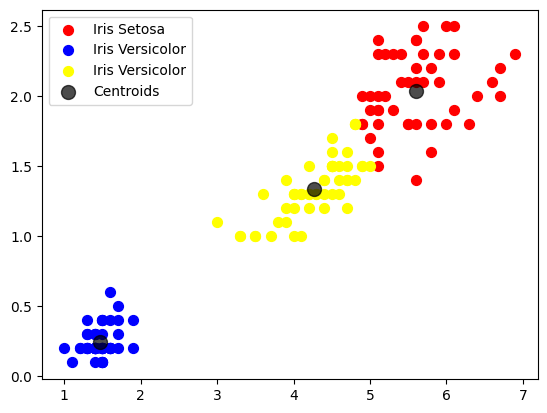

In [16]:
plt.scatter(x[y_means == 0]['PetalLengthCm'], x[y_means == 0]['PetalWidthCm'], s = 50, c = 'red', label = 'Iris Setosa')
plt.scatter(x[y_means == 1]['PetalLengthCm'], x[y_means == 1]['PetalWidthCm'], s = 50, c = 'blue', label = 'Iris Versicolor')
plt.scatter(x[y_means == 2]['PetalLengthCm'], x[y_means == 2]['PetalWidthCm'], s = 50, c = 'yellow', label = 'Iris Versicolor')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=100,c='black',label='Centroids',alpha=0.7)
plt.legend()
plt.show()

### Validation of Clusters.

In [17]:
silhouette_score(x,y_means)

0.6602760882193361